### 예제
1. drinks.csv 파일 로드
2. 결측치를 확인
3. 데이터프레임의 정보 출력
4. continent 컬럼에서 결측치 존재 -> 결측치 'OT'로 대체
5. continent 별 spirit_Servings 컬럼의 평균, 최소, 최대, 합계를 출력
6. total_litres_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력

7. 국가별 술 소비량 대비 알콜 비율 컬럼을 추가 

In [197]:
import pandas as pd

In [198]:
import matplotlib.pyplot as plt

In [199]:
drinks = pd.read_csv("../csv/drinks.csv")

In [200]:
# 결측치를 'OT'로 대체
# 결측치를 대체하는 함수 -> fillna('OT)
drinks = drinks.fillna('OT')#.value_counts
# drinks.loc[(drinks['continent].isna()),'continent] = 'OT'

In [201]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [202]:
#continent 별 spirit_Servings 컬럼의 평균, 최소, 최대, 합계를 출력
group_data=drinks[['continent','spirit_servings']].groupby('continent').agg(['mean','sum','max','min'])

group_data

spirit_servings               
                     mean   sum  max min
continent                               
AF              16.339623   866  152   0
AS              60.840909  2677  326   0
EU             132.555556  5965  373   0
OC              58.437500   935  254   0
OT             165.739130  3812  438  68
SA             114.750000  1377  302  25

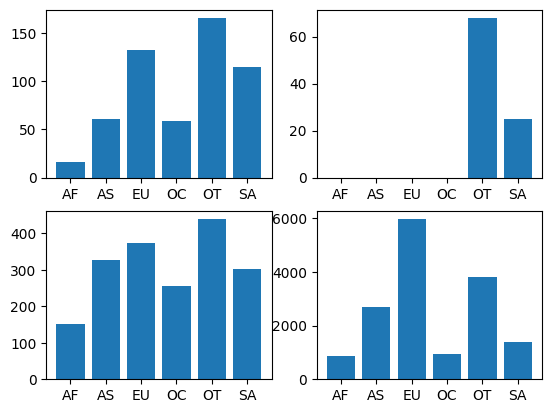

In [203]:
# 바형 그래프
# 한 화면에 4개의 그래프
# bar() x와 y의 값이 필수 항목

x= group_data.index

# subplot(행의 수, 열의 수, 영역지정)
plt.subplot(2,2,1)
plt.bar(x, group_data['spirit_servings']['mean'])
plt.subplot(2,2,2)
plt.bar(x, group_data['spirit_servings']['min'])
plt.subplot(2,2,3)
plt.bar(x, group_data['spirit_servings']['max'])
plt.subplot(2,2,4)
plt.bar(x, group_data['spirit_servings']['sum'])  
plt.show()

In [204]:
# 전체 알콜의 소비량의 평균보다 높은 대륙은 어디인가?
# 전체 알콜 소비량의 평균
total_mean = drinks['total_litres_of_pure_alcohol'].mean()

In [205]:
group_data2 = drinks[['continent','total_litres_of_pure_alcohol']].groupby('continent').mean()['total_litres_of_pure_alcohol']

In [206]:
group_data2[group_data2 > total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [208]:
# 국가별 술 소비량 대비 알콜의 비율 생성
# 국가별 술 소비량 파생변수 생성
drinks['total_servings'] = drinks['beer_servings'] +drinks['spirit_servings'] +drinks['wine_servings'] 

In [210]:
drinks.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0


In [213]:
# 술소비량 대비 알콜 비율이라는 파생변수 생성
# 알콜 소비량 / 술 소비량 * 100
drinks['alcohol_rate'] = (drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']*100).fillna(0)

In [215]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,1.766055
189,Vietnam,111,2,1,2.0,AS,114,1.754386
190,Yemen,6,0,0,0.1,AS,6,1.666667
191,Zambia,32,19,4,2.5,AF,55,4.545455


In [233]:
#내림차순으로 분류는 성공
drinks_rank= drinks.sort_values('alcohol_rate', ascending= False, ignore_index= True)
#원하는 나라 순위를 찾아보자


In [235]:
#원하는 나라 순위를 찾아보자
drinks_rank.loc[drinks_rank['country']=='South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,5.939394


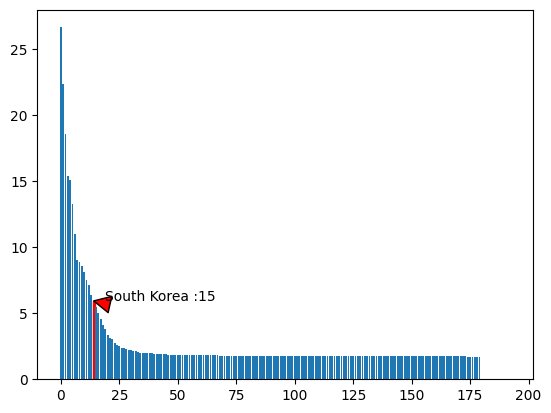

In [255]:
# 시각화
# 우리나라를 그래프에서 표기
x = list(range(len(drinks_rank)))
y = drinks_rank['alcohol_rate']

# 국가리스트 생성
country_list = drinks_rank['country'].tolist()

bar_list = plt.bar(x,y)

korea_rank = country_list.index('South Korea')
korea_alcohol_rate = drinks_rank.loc[drinks_rank['country']== 'South Korea', 'alcohol_rate']
# 그래프커스텀 / 한국 표시하기
# South Korea만 색상 변경
bar_list[country_list.index('South Korea')].set_color('r')  # 여기서 index는 country_list에서 위치를 뜻함

# 그래프에 글씨와 화살표 추가
plt.annotate('South Korea :' + str(korea_rank + 1), xy=(korea_rank, korea_alcohol_rate), xytext=(korea_rank+ 5, korea_alcohol_rate+0.03),arrowprops=dict(facecolor = 'r', shrink =0.01))

plt.show()